<a href="https://colab.research.google.com/github/haarika-09/CapsuleNetwork/blob/main/Crime_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/Crime-Prediction-and-Analysis/7th-Semester-Project/blob/main/Crime%20Prediction_clustering.ipynb


Crime-prediction-analysis.ipynb

In [41]:
import numpy as np
import timeit
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [9]:
from google.colab import files
uploaded=files.upload()
print(uploaded)

Saving Major_Crime_Indicators_Open_Data_-3805566126367379926.csv to Major_Crime_Indicators_Open_Data_-3805566126367379926.csv


In [10]:
df=pd.read_csv("/content/Major_Crime_Indicators_Open_Data_-3805566126367379926.csv")
df['Total'] = 1
df.head()


,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y,Total
0,1,GO-20141637937,1/1/2014 5:00:00 AM,3/1/2012 5:00:00 AM,2014,January,1,1,Wednesday,16,...,Assault,120,Clairlea-Birchmount (120),120,Clairlea-Birchmount (120),-79.286725,43.700100,-8.826158e+06,5.419149e+06,1
1,2,GO-20141260793,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,3,...,Assault,081,Trinity-Bellwoods (81),081,Trinity-Bellwoods (81),-79.410994,43.649686,-8.839991e+06,5.411389e+06,1
2,3,GO-20141259834,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,0,...,Assault,055,Thorncliffe Park (55),055,Thorncliffe Park (55),-79.346615,43.703234,-8.832825e+06,5.419631e+06,1
3,4,GO-20141260264,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,1,...,Assault,143,West Rouge (143),131,Rouge (131),-79.132915,43.780413,-8.809036e+06,5.431523e+06,1
4,5,GO-20141260264,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,1,...,Assault,143,West Rouge (143),131,Rouge (131),-79.132915,43.780413,-8.809036e+06,5.431523e+06,1


In [11]:
df.dtypes
df.dropna()

,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y,Total
0,1,GO-20141637937,1/1/2014 5:00:00 AM,3/1/2012 5:00:00 AM,2014,January,1,1,Wednesday,16,...,Assault,120,Clairlea-Birchmount (120),120,Clairlea-Birchmount (120),-79.286725,43.700100,-8.826158e+06,5.419149e+06,1
1,2,GO-20141260793,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,3,...,Assault,081,Trinity-Bellwoods (81),081,Trinity-Bellwoods (81),-79.410994,43.649686,-8.839991e+06,5.411389e+06,1
2,3,GO-20141259834,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,0,...,Assault,055,Thorncliffe Park (55),055,Thorncliffe Park (55),-79.346615,43.703234,-8.832825e+06,5.419631e+06,1
3,4,GO-20141260264,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,1,...,Assault,143,West Rouge (143),131,Rouge (131),-79.132915,43.780413,-8.809036e+06,5.431523e+06,1
4,5,GO-20141260264,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,1,...,Assault,143,West Rouge (143),131,Rouge (131),-79.132915,43.780413,-8.809036e+06,5.431523e+06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430609,430610,GO-2025669590,3/31/2025 4:00:00 AM,3/31/2025 4:00:00 AM,2025,March,31,90,Monday,17,...,Assault,019,Long Branch (19),019,Long Branch (19),-79.533894,43.590163,-8.853673e+06,5.402236e+06,1
430610,430611,GO-2025668941,3/31/2025 4:00:00 AM,3/31/2025 4:00:00 AM,2025,March,31,90,Monday,16,...,Robbery,078,Kensington-Chinatown (78),078,Kensington-Chinatown (78),-79.389467,43.650223,-8.837595e+06,5.411472e+06,1
430611,430612,GO-2025664362,3/31/2025 4:00:00 AM,3/31/2025 4:00:00 AM,2025,March,31,90,Monday,3,...,Break and Enter,078,Kensington-Chinatown (78),078,Kensington-Chinatown (78),-79.393644,43.649318,-8.838060e+06,5.411333e+06,1
430612,430613,GO-2025668941,3/31/2025 4:00:00 AM,3/31/2025 4:00:00 AM,2025,March,31,90,Monday,16,...,Robbery,078,Kensington-Chinatown (78),078,Kensington-Chinatown (78),-79.389467,43.650223,-8.837595e+06,5.411472e+06,1


In [14]:
print('Original Data Size after dropping Duplicates')
df = df.drop_duplicates(subset='EVENT_UNIQUE_ID',keep='first')
df.shape

Original Data Size after dropping Duplicates


(375015, 32)

In [17]:
# Inspect the column names in the DataFrame to identify the correct ones.
# print(df.columns)

drop_colmns = ['x', 'y', 'HOOD_158', 'HOOD_140'] # Update with correct column names based on df.columns
df_dropped = df.drop(columns=drop_colmns)

# Display the columns of the new dataframe to confirm the columns are dropped
# print(df_dropped.columns)

In [18]:
df_dropped.dtypes

,0
OBJECTID,int64
EVENT_UNIQUE_ID,object
REPORT_DATE,object
OCC_DATE,object
REPORT_YEAR,int64
REPORT_MONTH,object
REPORT_DAY,int64
REPORT_DOY,int64
REPORT_DOW,object
REPORT_HOUR,int64


                           OFFENCE    size
0      Administering Noxious Thing     485
1    Aggravated Aslt Peace Officer      14
2               Aggravated Assault    2025
3   Aggravated Assault Avails Pros       9
4   Air Gun Or Pistol: Bodily Harm      16
5                          Assault  140668
6      Assault - Force/Thrt/Impede     355
7   Assault - Resist/ Prevent Seiz    2575
8              Assault Bodily Harm    7291
9            Assault Peace Officer    4973
10   Assault Peace Officer Wpn/Cbh     482
11             Assault With Weapon   29077
12     Crim Negligence Bodily Harm     122
13  Disarming Peace/Public Officer      75
14  Discharge Firearm - Recklessly    1648
15   Discharge Firearm With Intent    1988
16   Hoax Terrorism Causing Bodily       1
17              Pointing A Firearm    1133
18  Set/Place Trap/Intend Death/Bh       1
19  Traps Likely Cause Bodily Harm       2
20  Unlawfully Causing Bodily Harm      11
21  Use Firearm / Immit Commit Off     132


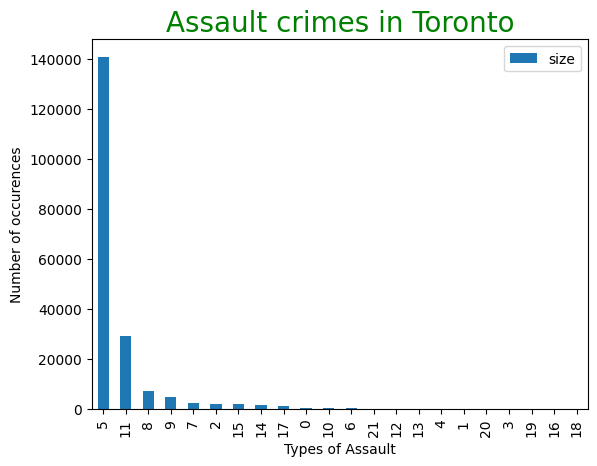

In [21]:
assault = df[df['MCI_CATEGORY'] == 'Assault']
assault_types = assault.groupby('OFFENCE',as_index=False).size()
print(assault_types)
ct = assault_types.sort_values(by='size', ascending = False)
ax = ct.plot.bar()
ax.set_xlabel('Types of Assault')
ax.set_ylabel('Number of occurences')
ax.set_title('Assault crimes in Toronto',color = 'green',fontsize=20)
plt.show()

In [23]:
df_grouped = df_dropped.groupby(df_dropped['OCC_YEAR'])

In [24]:
#Analysis by year
df_2015 = df_grouped.get_group(2015)
df_2016 = df_grouped.get_group(2016)
df_2017 = df_grouped.get_group(2017)


In [26]:
df_2015_grouped = df_2015.groupby(df_2015['MCI_CATEGORY']).count()
df_2016_grouped = df_2016.groupby(df_2016['MCI_CATEGORY']).count()
df_2017_grouped = df_2017.groupby(df_2017['MCI_CATEGORY']).count()

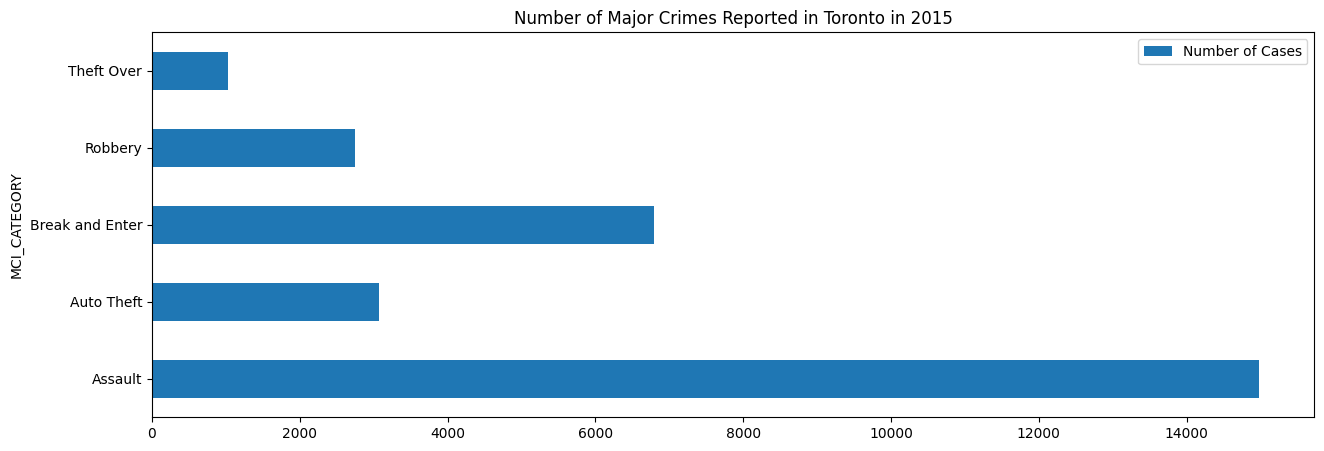

In [27]:
plot = df_2015_grouped.iloc[:,0]
plot = pd.DataFrame(plot)
plot.columns = ['Number of Cases']
ax = plot.plot(kind='barh',figsize=(15,5),title='Number of Major Crimes Reported in Toronto in 2015')

In [28]:
df.head()

,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y,Total
0,1,GO-20141637937,1/1/2014 5:00:00 AM,3/1/2012 5:00:00 AM,2014,January,1,1,Wednesday,16,...,Assault,120,Clairlea-Birchmount (120),120,Clairlea-Birchmount (120),-79.286725,43.700100,-8.826158e+06,5.419149e+06,1
1,2,GO-20141260793,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,3,...,Assault,081,Trinity-Bellwoods (81),081,Trinity-Bellwoods (81),-79.410994,43.649686,-8.839991e+06,5.411389e+06,1
2,3,GO-20141259834,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,0,...,Assault,055,Thorncliffe Park (55),055,Thorncliffe Park (55),-79.346615,43.703234,-8.832825e+06,5.419631e+06,1
3,4,GO-20141260264,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,1,...,Assault,143,West Rouge (143),131,Rouge (131),-79.132915,43.780413,-8.809036e+06,5.431523e+06,1
5,6,GO-20141260715,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,3,...,Assault,092,Corso Italia-Davenport (92),092,Corso Italia-Davenport (92),-79.455770,43.677775,-8.844976e+06,5.415712e+06,1


In [32]:
col_list = ['OCC_YEAR',   'OCC_MONTH','OCC_DAY','OCC_DOY','OCC_DOW','OCC_HOUR','MCI_CATEGORY',   'DIVISION',     'HOOD_158','PREMISES_TYPE']


df2 = df[col_list]
df2 = df2[df2['OCC_YEAR'] > 2013]

#Factorize dependent variable column:
crime_var = pd.factorize(df2['MCI_CATEGORY'])
df2['MCI_CATEGORY'] = crime_var[0]
definition_list_MCI = crime_var[1]

#factorize independent variables:
premise_var = pd.factorize(df2['PREMISES_TYPE'])
df2['PREMISES_TYPE'] = premise_var[0]
definition_list_premise = premise_var[1]

#factorize occurenceyear:
year_var = pd.factorize(df2['OCC_YEAR'])
df2['OCC_YEAR'] = year_var[0]
definition_list_year = year_var[1]

#factorize occurencemonth:
month_var = pd.factorize(df2['OCC_MONTH'])
df2['OCC_MONTH'] = month_var[0]
definition_list_month = month_var[1]

#factorize occurenceday:
day_var = pd.factorize(df2['OCC_DAY'])
df2['OCC_DAY'] = day_var[0]
definition_list_day = day_var[1]

#factorize occurencedayofweek:
dayweek_var = pd.factorize(df2['OCC_DOW'])
df2['OCC_DOW'] = dayweek_var[0]
definition_list_day = dayweek_var[1]

#factorize division:
division_var = pd.factorize(df2['DIVISION'])
df2['DIVISION'] = division_var[0]
definition_list_division = division_var[1]

#factorize HOOD_ID:
hood_var = pd.factorize(df2['HOOD_158'])
df2['HOOD_158'] = hood_var[0]
definition_list_hood = hood_var[1]

#factorize occurencehour:
hour_var = pd.factorize(df2['OCC_HOUR'])
df2['OCC_HOUR'] = hour_var[0]
definition_list_hour = hour_var[1]

#factorize occurencedayofyear:
dayyear_var = pd.factorize(df2['OCC_DOY'])
df2['OCC_DOY'] = dayyear_var[0]
definition_list_dayyear = dayyear_var[1]

In [33]:
df2.head()

,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,MCI_CATEGORY,DIVISION,HOOD_158,PREMISES_TYPE
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,1,1,1
3,0,0,0,0,0,2,0,2,2,2
5,0,0,0,0,0,0,0,3,3,3
6,0,0,0,0,0,1,0,1,4,2


In [36]:
x = df2.drop(['MCI_CATEGORY'],axis=1).values
y = df2['MCI_CATEGORY'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 21)
binary_encoder = OneHotEncoder(categories='auto')
encoded_X = binary_encoder.fit_transform(x)
X_train_OH, X_test_OH, y_train_OH, y_test_OH = train_test_split(encoded_X, y, test_size = 0.25, random_state = 21)
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy of Random Forest : ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred, target_names=definition_list_MCI))

Accuracy of Random Forest :  0.600044961622044
[[39002  4229   722  3893   138]
 [ 8837  8889   119  1027    66]
 [ 4841   667   563   994    38]
 [ 6542  1361   344  7525    68]
 [ 2302   604    69   500    73]]
                 precision    recall  f1-score   support

        Assault       0.63      0.81      0.71     47984
Break and Enter       0.56      0.47      0.51     18938
        Robbery       0.31      0.08      0.13      7103
     Auto Theft       0.54      0.48      0.51     15840
     Theft Over       0.19      0.02      0.04      3548

       accuracy                           0.60     93413
      macro avg       0.45      0.37      0.38     93413
   weighted avg       0.56      0.60      0.57     93413



In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model Training
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
classifier.fit(X_train_OH, y_train_OH)

# Prediction
y_pred_OH = classifier.predict(X_test_OH)

# Evaluation
print("Accuracy of Random Forest with OneHotEncoder:", accuracy_score(y_test_OH, y_pred_OH))
print(confusion_matrix(y_test_OH, y_pred_OH))
print(classification_report(y_test_OH, y_pred_OH, target_names=definition_list_MCI))


Accuracy of Random Forest with OneHotEncoder: 0.6176442251078543
[[40859  3452   256  3364    53]
 [ 9106  8863    31   917    21]
 [ 5323   549   321   896    14]
 [ 6851  1198   148  7609    34]
 [ 2492   552    24   436    44]]
                 precision    recall  f1-score   support

        Assault       0.63      0.85      0.73     47984
Break and Enter       0.61      0.47      0.53     18938
        Robbery       0.41      0.05      0.08      7103
     Auto Theft       0.58      0.48      0.52     15840
     Theft Over       0.27      0.01      0.02      3548

       accuracy                           0.62     93413
      macro avg       0.50      0.37      0.38     93413
   weighted avg       0.59      0.62      0.58     93413



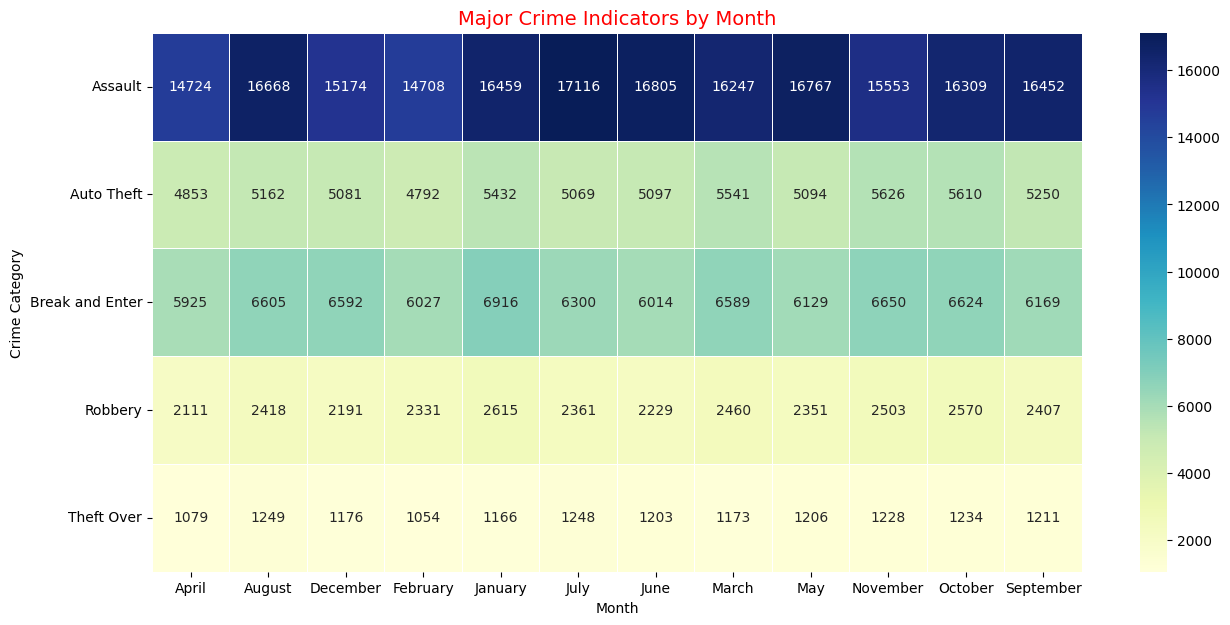

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group data by Month and MCI Category, summing the 'Total'
mci_monthwise = df.groupby(['OCC_MONTH', 'MCI_CATEGORY'], as_index=False).agg({'Total': 'sum'})

# Step 2: Pivot the data to create a matrix for the heatmap
crime_count = mci_monthwise.pivot(index='MCI_CATEGORY', columns='OCC_MONTH', values='Total')

# Step 3: Plot the heatmap
plt.figure(figsize=(15, 7))
ax = sns.heatmap(crime_count, cmap="YlGnBu", linewidths=0.5, annot=True, fmt='g')
plt.title("Major Crime Indicators by Month", color='red', fontsize=14)
plt.xlabel("Month")
plt.ylabel("Crime Category")
plt.yticks(rotation=0)  # Keep category labels horizontal for better readability
plt.show()


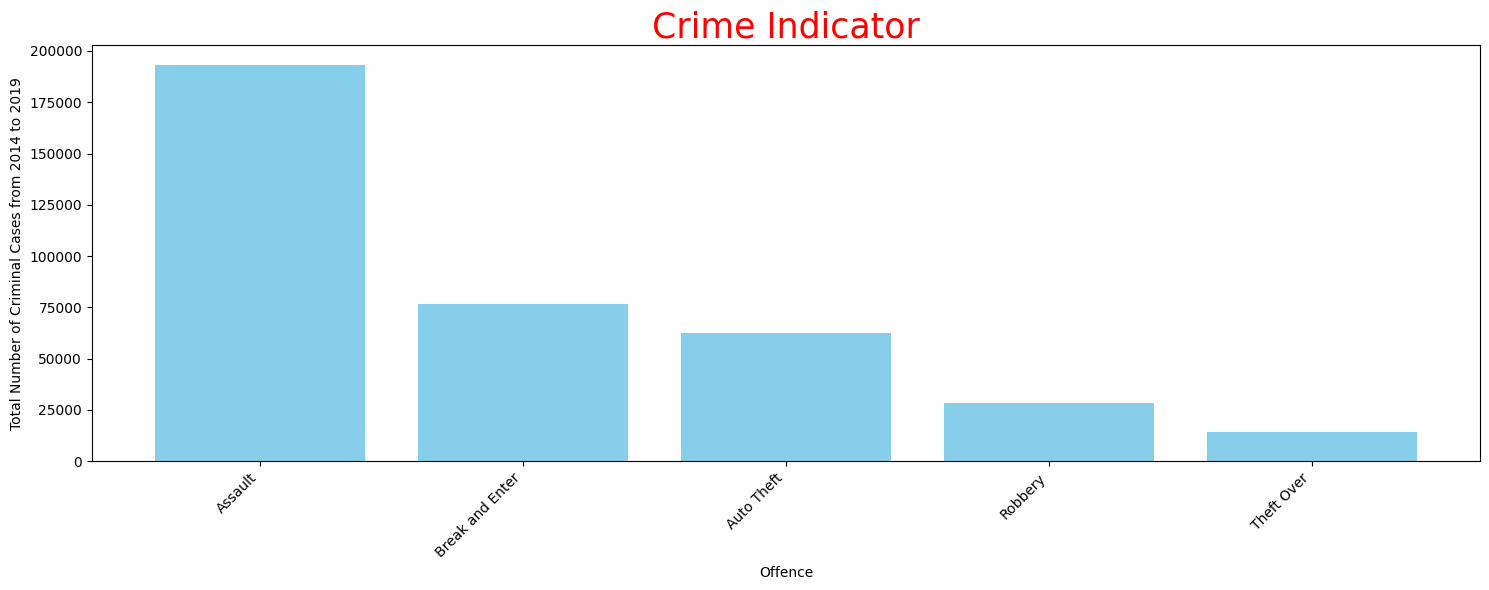

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group and count occurrences by 'MCI'
major_crime_indicator = df.groupby('MCI_CATEGORY').size().reset_index(name='Total')

# Step 2: Sort the values in descending order
major_crime_indicator = major_crime_indicator.sort_values(by='Total', ascending=False)

# Step 3: Plotting
plt.figure(figsize=(15, 6))
ax = plt.bar(major_crime_indicator['MCI_CATEGORY'], major_crime_indicator['Total'], color='skyblue')
plt.xlabel('Offence')
plt.ylabel('Total Number of Criminal Cases from 2014 to 2019')
plt.title('Crime Indicator', color='red', fontsize=25)
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels for readability
plt.tight_layout()
plt.show()


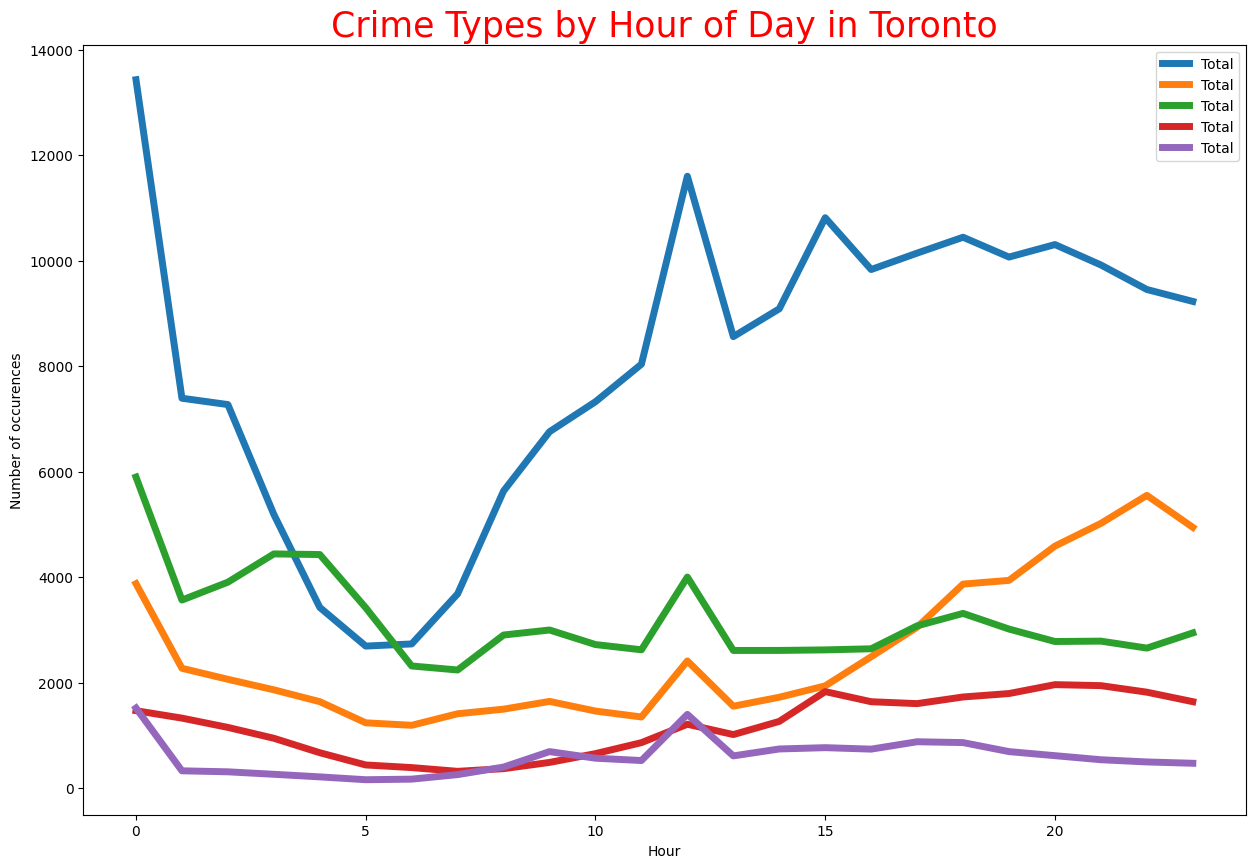

In [51]:
hour_crime_group = df.groupby(['OCC_HOUR','MCI_CATEGORY'],as_index=False).agg({'Total':'sum'})
fig, ax = plt.subplots(figsize=(15,10))
hour_crime_group.groupby('MCI_CATEGORY').plot(x="OCC_HOUR", y="Total", ax=ax,linewidth=5)
ax.set_xlabel('Hour')
ax.set_ylabel('Number of occurences')
ax.set_title('Crime Types by Hour of Day in Toronto',color = 'red',fontsize=25)

In [54]:
df_g0 = df_2015.groupby(['NEIGHBOURHOOD_158','MCI_CATEGORY']).size().to_frame('count').reset_index()
df_g0 = df_g0.pivot(index='NEIGHBOURHOOD_158',columns='MCI_CATEGORY',values='count')
df_g0 = df_g0.dropna()

df_g = df_2016.groupby(['NEIGHBOURHOOD_158','MCI_CATEGORY']).size().to_frame('count').reset_index()
df_g = df_g.pivot(index='NEIGHBOURHOOD_158',columns='MCI_CATEGORY',values='count')
df_g = df_g.dropna()


df_g2 = df_2017.groupby(['NEIGHBOURHOOD_158','MCI_CATEGORY']).size().to_frame('count').reset_index()
df_g2 = df_g2.pivot(index='NEIGHBOURHOOD_158',columns='MCI_CATEGORY',values='count')
df_g2 = df_g2.dropna()

In [55]:
df_g0.head(10)

MCI_CATEGORY,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
NEIGHBOURHOOD_158,,,,,
Agincourt North (129),61.0,26.0,53.0,28.0,6.0
Agincourt South-Malvern West (128),85.0,26.0,59.0,15.0,9.0
Alderwood (20),37.0,15.0,27.0,6.0,4.0
Annex (95),187.0,15.0,107.0,38.0,19.0
Avondale (153),24.0,4.0,9.0,3.0,2.0
Banbury-Don Mills (42),66.0,18.0,87.0,10.0,15.0
Bathurst Manor (34),40.0,23.0,30.0,7.0,2.0
Bay-Cloverhill (169),89.0,4.0,45.0,13.0,10.0
Bayview Village (52),87.0,14.0,35.0,5.0,9.0


In [56]:
scaler = StandardScaler()
Sum_of_squared_distances0 = []
Sum_of_squared_distances = []
Sum_of_squared_distances2 = []

std_scale = scaler.fit(df_g0)
df_transformed0 = std_scale.transform(df_g0)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed0)
X0 = pca.transform(df_transformed0)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed0)
    Sum_of_squared_distances0.append(km.inertia_)


std_scale = scaler.fit(df_g)
df_transformed = std_scale.transform(df_g)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed)
X = pca.transform(df_transformed)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)


std_scale = scaler.fit(df_g2)
df_transformed2 = std_scale.transform(df_g2)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed2)
X1 = pca.transform(df_transformed2)

K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed2)
    Sum_of_squared_distances2.append(km.inertia_)

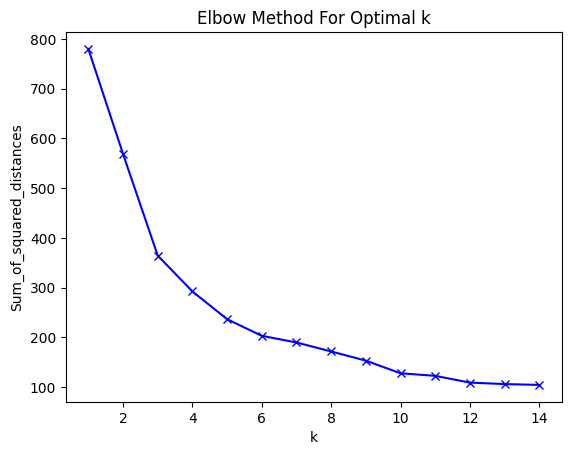

In [57]:
plt.plot(K, Sum_of_squared_distances0, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

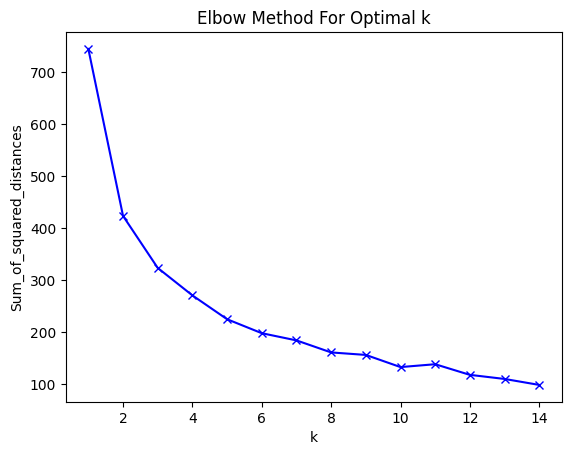

In [58]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

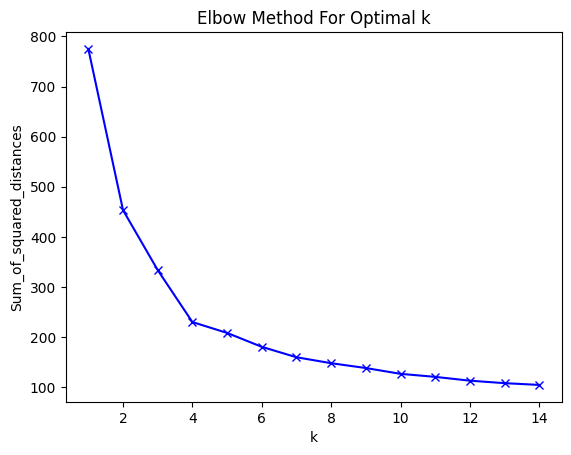

In [59]:
plt.plot(K, Sum_of_squared_distances2, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.657883424173103
For n_clusters = 3 The average silhouette_score is : 0.45884281602028554
For n_clusters = 4 The average silhouette_score is : 0.4210585147872342
For n_clusters = 5 The average silhouette_score is : 0.4834352821054621


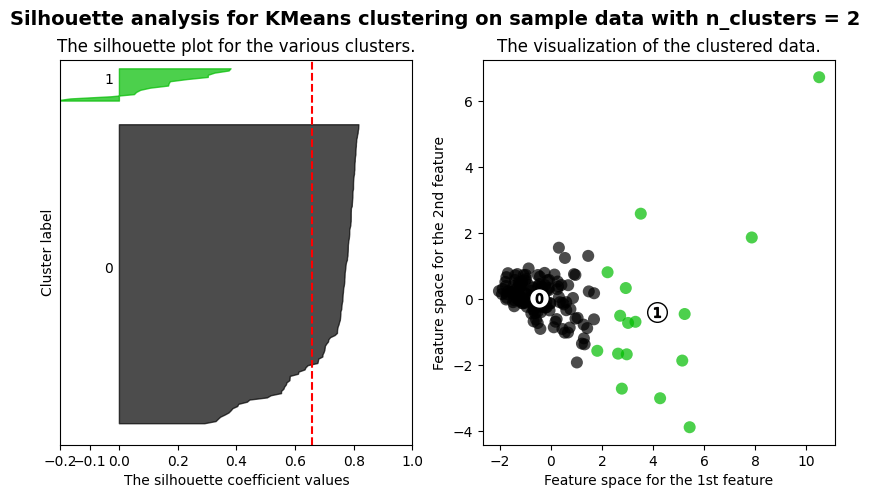

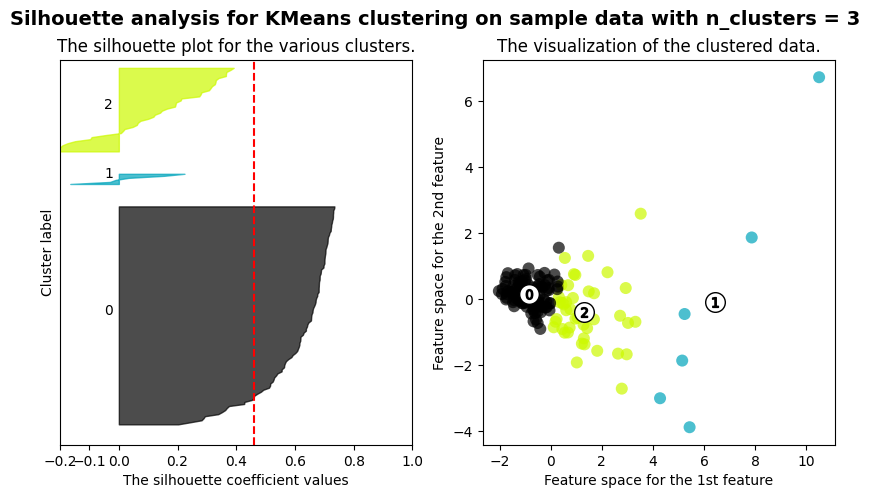

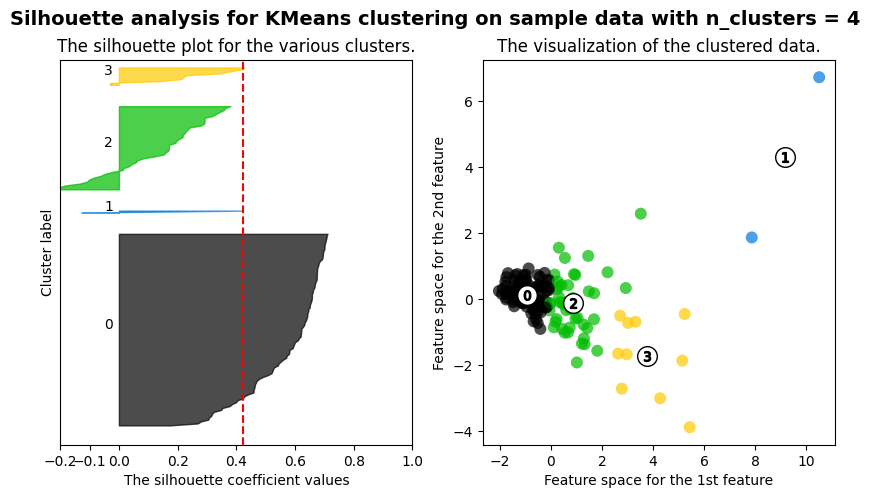

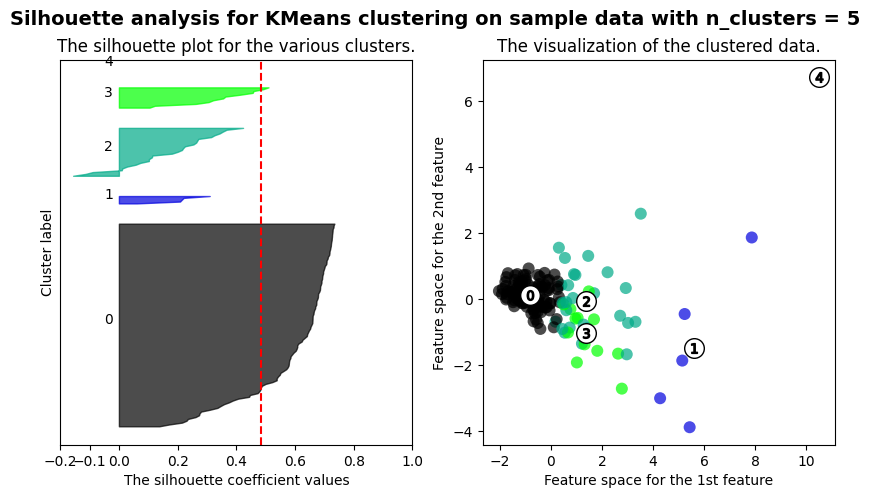

/tmp/ipython-input-60-2484761493.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/tmp/ipython-input-60-2484761493.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


In [60]:
for n_clusters in range(2,6):
    kmeans = KMeans(n_clusters=n_clusters , random_state=3425)
    cluster_labels = kmeans.fit_predict(X0)
    silhouette_avg = silhouette_score(X0, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X0, cluster_labels)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)


    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    y_lower = 10
    for i in range(n_clusters):
       # samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Computing the new y_lower
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # showing the actual cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X0[:, 0], X0[:, 1], marker='.', s=300, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    #  cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
        ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')

plt.show()
ax1.legend()
ax2.legend()


running time is : 0.003201274000275589


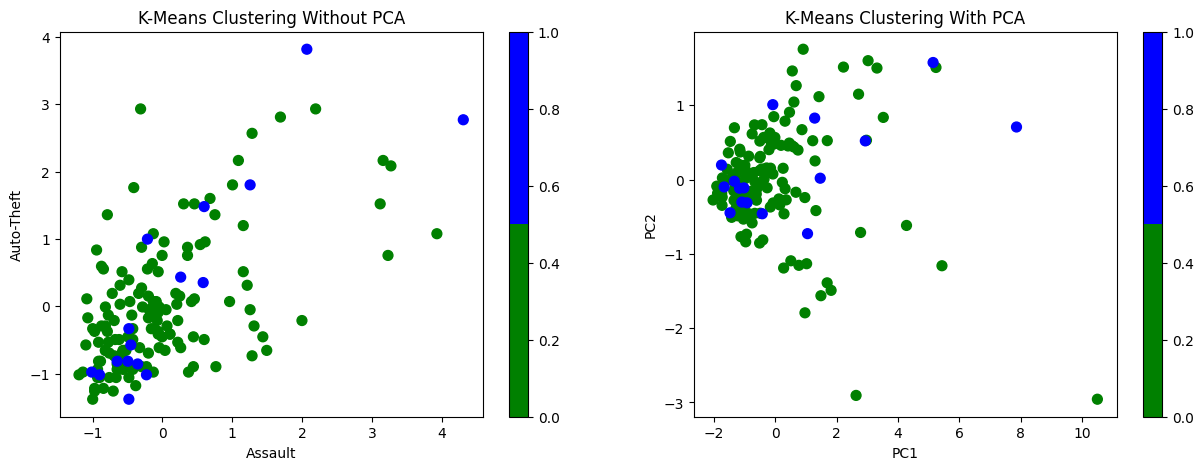

running time is : 0.0021807069997521467


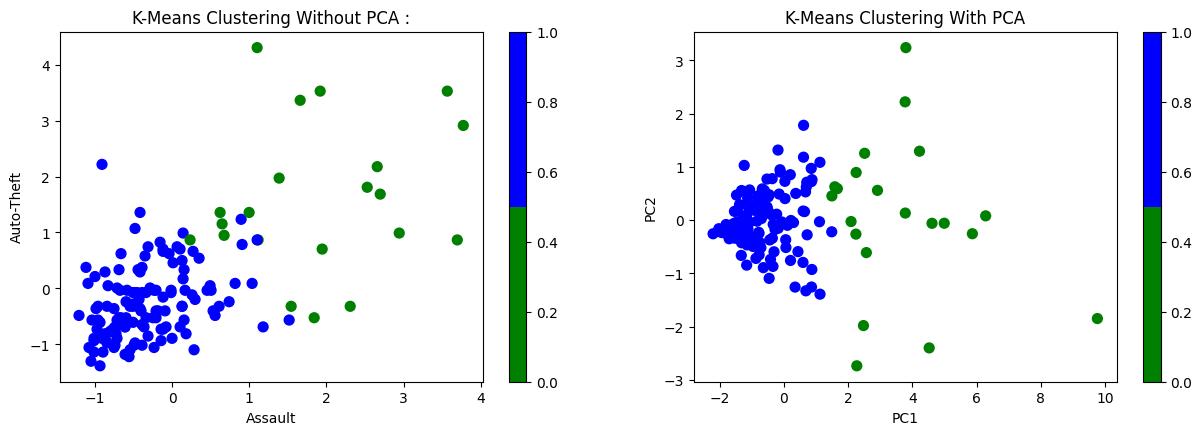

running time is : 0.00437643500026752


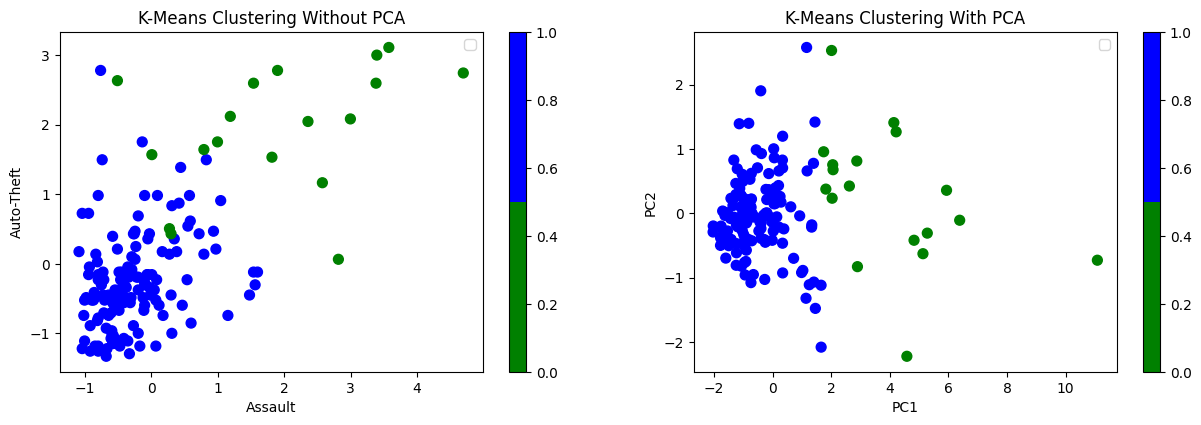

/tmp/ipython-input-63-1636818631.py:113: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


In [63]:
#Plotting the cluster obtained using GMM
kmeans = KMeans(n_clusters=2,random_state=3425)
colors = ['green','blue']


plt.figure(figsize=(15, 5))

ax = plt.subplot(121)
kc =kmeans.fit(df_transformed0)
label = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(df_transformed0)
label = label.sort_values(by=0)
df_result['label']=label

scatter = plt.scatter(df_result[0],df_result[2],
                     c=list(label.iloc[:,0]), cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering Without PCA')
plt.xlabel('Assault')
plt.ylabel('Auto-Theft')
plt.colorbar(scatter)


ax = plt.subplot(122)
start = timeit.default_timer()
kc =kmeans.fit(X0)
stop = timeit.default_timer()
klabel0 = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(X0)
klabel0 = klabel0.sort_values(by=0)
df_result['label']=klabel0
scatter = plt.scatter(df_result[0],df_result[2],
                      c = list(klabel0.iloc[:,0]), cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
plt.show()


colors = ['green','blue']
#Plotting the cluster obtained using GMM
kmeans = KMeans(n_clusters=2,random_state=342)
plt.figure(figsize=(15, 10))

ax = plt.subplot(221)

kc =kmeans.fit(df_transformed)

label = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(df_transformed)
label.sort_values(by=0)
df_result['label']=label
scatter = plt.scatter(df_result[0],df_result[2],
                       c = list(label.iloc[:,0]), cmap= matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering Without PCA :')
plt.xlabel('Assault')
plt.ylabel('Auto-Theft')
plt.colorbar(scatter)

ax = plt.subplot(222)
start = timeit.default_timer()
kc =kmeans.fit(X)
stop = timeit.default_timer()
klabel1 = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(X)
klabel1.sort_values(by=0)
df_result['label']=klabel1
scatter = plt.scatter(df_result[0],df_result[2],
                      c = list(klabel1.iloc[:,0]), cmap= matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
plt.show()


#Plotting the cluster obtained using GMM
kmeans = KMeans(n_clusters=2,random_state=342)
plt.figure(figsize=(15, 15))
ax = plt.subplot(321)
kc =kmeans.fit(df_transformed2)
label = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(df_transformed2)
label.sort_values(by=0)
df_result['label']=label
scatter = plt.scatter(df_result[0],df_result[2],
                      c = list(label.iloc[:,0]), cmap= matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering Without PCA')
plt.xlabel('Assault')
plt.ylabel('Auto-Theft')
plt.colorbar(scatter)
ax.legend()

ax = plt.subplot(322)
start = timeit.default_timer()
kc =kmeans.fit(X1)
stop = timeit.default_timer()
klabel2 = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(X1)
klabel2.sort_values(by=0)
df_result['label']=klabel2
scatter = plt.scatter(df_result[0],df_result[2],
                      c = list(klabel2.iloc[:,0]), cmap= matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
ax.legend()
plt.show()
ax.legend()

In [64]:
X_list = [X0, X, X1]
year_list = [2015,2016,2017]
for i,y in zip(X_list,year_list):
    from sklearn import metrics
    clustering = KMeans(n_clusters=2,random_state=3425).fit(i)
    labels = clustering.labels_
    print("Silhouette score(K-means) for year",y,"is",metrics.silhouette_score(i, labels, metric='euclidean'))

Silhouette score(K-means) for year 2015 is 0.657883424173103
Silhouette score(K-means) for year 2016 is 0.6544802345752143
Silhouette score(K-means) for year 2017 is 0.6994691402776306


In [65]:
neighborhoods0 = df_g0.index
neighborhoods0 = np.array(neighborhoods0)

neighborhoods = df_g.index
neighborhoods = np.array(neighborhoods)

neighborhoods2 = df_g2.index
neighborhoods2 = np.array(neighborhoods2)
#Display Neighboorhoods
print('Crime Neighborhoods by K-Means in 2015')
print(neighborhoods0[np.where(klabel0[0]==1)])
kviolent15 = neighborhoods0[np.where(klabel0[0]==1)]
kviolent15s = neighborhoods0[np.where(klabel0[0]==0)]
kviolent15m = neighborhoods0[np.where(klabel0[0]==2)]

print('Crime Neighborhoods by K-Means in 2016')
print(neighborhoods[np.where(klabel1[0]==1)])
kviolent16 = neighborhoods[np.where(klabel1[0]==1)]
kviolent16s = neighborhoods[np.where(klabel1[0]==0)]
kviolent16m = neighborhoods[np.where(klabel1[0]==2)]


print('Crime Neighborhoods by K-Means in 2017')
print(neighborhoods2[np.where(klabel2[0]==1)])
kviolent17 = neighborhoods2[np.where(klabel2[0]==1)]
kviolent17s = neighborhoods2[np.where(klabel2[0]==0)]
kviolent17m = neighborhoods2[np.where(klabel2[0]==2)]

Crime Neighborhoods by K-Means in 2015
['Westminster-Branson (35)' 'Weston (113)' 'Weston-Pelham Park (91)'
 'Wexford/Maryvale (119)' 'Willowdale West (37)'
 'Willowridge-Martingrove-Richview (7)' 'Woburn North (142)'
 'Woodbine Corridor (64)' 'Woodbine-Lumsden (60)' 'Wychwood (94)'
 'Yonge-Bay Corridor (170)' 'Yonge-Doris (151)' 'Yonge-Eglinton (100)'
 'Yonge-St.Clair (97)' 'York University Heights (27)'
 'Yorkdale-Glen Park (31)']
Crime Neighborhoods by K-Means in 2016
['Agincourt North (129)' 'Agincourt South-Malvern West (128)'
 'Alderwood (20)' 'Avondale (153)' 'Banbury-Don Mills (42)'
 'Bathurst Manor (34)' 'Bay-Cloverhill (169)' 'Bayview Village (52)'
 'Bedford Park-Nortown (39)' 'Beechborough-Greenbrook (112)'
 'Bendale South (157)' 'Bendale-Glen Andrew (156)'
 'Birchcliffe-Cliffside (122)' 'Black Creek (24)'
 'Briar Hill-Belgravia (108)' 'Bridle Path-Sunnybrook-York Mills (41)'
 'Broadview North (57)' 'Brookhaven-Amesbury (30)'
 'Cabbagetown-South St.James Town (71)' 'Casa Lom

ValueError: 'c' argument has 375015 elements, which is inconsistent with 'x' and 'y' with size 1.

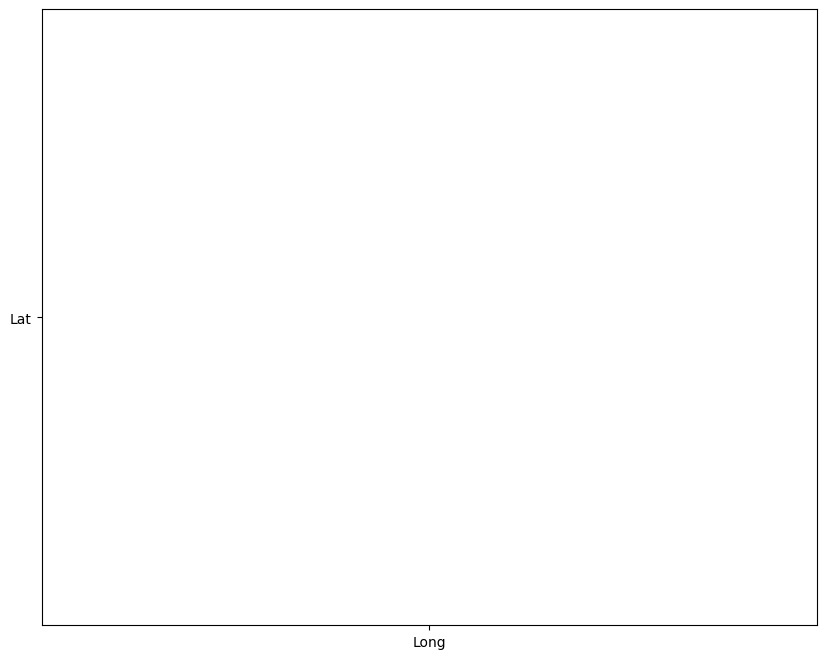

In [66]:
plt.figure(num=None, figsize=(10, 8))
plt.scatter("Long", "Lat", data = df, c = 'y',alpha = 0.1, edgecolor = 'black', s=2)
plt.grid()
plt.xlabel('long')
plt.ylabel('lat')
plt.title('Toronto Crime')
plt.tight_layout()
plt.axis('tight')

plt.show()